In [216]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# Food Access Data
- This section analyzes data from the U.S. Department of Agriculture, Economic Research Services, specifically the Food Access Research Atlas. 
- The dataset provides measures for access to fresh foods. A key indicator for access to fresh foods is the proximity to a full-service grocery store.
- This analysis uses a proximity of 1/2-mile, urban and 10-miles rural to measure access to fresh foods 

##### Research Questions

- Does income level impact access to fresh foods in San Francisco?
- How does fresh food access in San Francisco compare to access across California? 
- How does fresh food access in San Francisco compare to access across national data?
- What percentage of the population has low access to fresh foods?

source: https://www.ers.usda.gov/data-products/food-access-research-atlas/

In [217]:
# read the full Food Atlas csv file into a dataframe
fa_df = pd.read_csv("food_access_data.csv")

In [218]:
# Create income level bins for analysis; define lables for the bins
income_bins = [0, 25000, 45000, 75000, 100000, 150000, 200000, 25000000000]
income_labels = [">$25K", ">$45K", ">$75K", ">$100K", ">$150K", ">$200K", "$200K+"]

# Slice data into bins by income range

fa_df["Income_Range"] = pd.cut(fa_df['MedianFamilyIncome'], income_bins, labels=income_labels).dropna()

income_range = fa_df["Income_Range"]

In [219]:
# Create dataframe with only California data for comparison
ca_data = fa_df.loc[fa_df['State']=='California'] 

In [220]:
# Create dataframe with only San Francisco data 
sf_data = fa_df.loc[fa_df['County']=='San Francisco']

In [221]:
# Define variables for population - US
fa_pop_total = fa_df["POP2010"].sum()
fa_population = fa_df.groupby(income_range)["POP2010"].sum()
fa_pop_pct = fa_population/fa_pop_total * 100

# Define variables for population - CA
ca_pop_total = ca_data["POP2010"].sum()
ca_population = ca_data.groupby("Income_Range")["POP2010"].sum()
ca_pop_pct = ca_population/ca_pop_total * 100

# Define variables for population - CA
sf_pop_total = sf_data["POP2010"].sum()
sf_population = sf_data.groupby("Income_Range")["POP2010"].sum()
sf_pop_pct = sf_population/sf_pop_total * 100


In [222]:
# Create a DataFrame for comparing SF, CA, and US population by income
pop_by_income = pd.DataFrame({'US Population' : fa_population,
                                  'CA Population' : ca_population,
                                  'SF Population': sf_population,
                                  '% US Population' : fa_pop_pct,
                                  '% CA Population' : ca_pop_pct,
                                  '% SF Population': sf_pop_pct}).reset_index()

# sf_data = sf_df.loc[:, ['CensusTract', 'MedianFamilyIncome','PovertyRate', 'POP2010', 'LAPOP05_10',  'LALOWI05_10', 'lalowihalfshare']]
pop_by_income = pop_by_income.round(2)

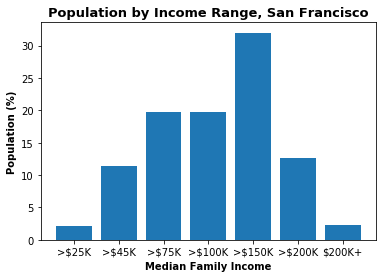

In [223]:
# Chart SF population by income data

x_axis = np.arange(len(income_labels))
y = pop_by_income['% SF Population']

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [">$25K", ">$45K", ">$75K", ">$100K", ">$150K", ">$200K", "$200K+"])
plt.xlabel(("Median Family Income"), fontweight='bold')

plt.ylabel(("Population (%)"), fontweight='bold')

plt.bar(x_axis, y)

plt.title(("Population by Income Range, San Francisco"), fontweight='bold', fontsize=13)

plt.savefig("Images/popbyincomesf.png")

plt.show()


In [224]:
# Define variables for low access population calculations
# lapophalfshare - Low access, population at 1/2 mile, share 

fa_low_access_pct = fa_df.groupby(income_range)["lapophalfshare"].mean()
fa_low_access_pct = fa_low_access_pct * 100

ca_low_access_pct = ca_data.groupby("Income_Range")["lapophalfshare"].mean()
ca_low_access_pct = ca_low_access_pct * 100

sf_low_access_pct = sf_data.groupby("Income_Range")["lapophalfshare"].mean()
sf_low_access_pct = sf_low_access_pct * 100

In [225]:
# Define variables for low access population calculations
# LAPOP05_10 - Low access, population at 1/2 mile for urban areas and 10 miles for rural areas, number 

fa_low_access_count = fa_df.groupby(income_range)["LAPOP05_10"].sum()

fa_low_access_pct5_10 = fa_df.groupby(income_range)["LAPOP05_10"].sum()
fa_low_access_pct5_10 = fa_low_access_pct5_10 / fa_pop_total * 100

ca_low_access_count = ca_data.groupby("Income_Range")["LAPOP05_10"].sum()

ca_low_access_pct5_10 = ca_data.groupby("Income_Range")["LAPOP05_10"].sum()
ca_low_access_pct5_10 = ca_low_access_pct5_10 / ca_pop_total * 100

sf_low_access_count = sf_data.groupby("Income_Range")["LAPOP05_10"].sum()
sf_low_access_pct5_10 = sf_data.groupby("Income_Range")["LAPOP05_10"].sum()
sf_low_access_pct5_10 = sf_low_access_pct5_10 / sf_pop_total * 100

# Define variables for low access population calculations
# LAPOP1_20 - Low access, population at 1 mile for urban areas and 20 miles for rural areas, number 

fa_low_access_pct1_20 = fa_df.groupby(income_range)["LAPOP1_20"].sum()
fa_low_access_pct1_20 = fa_low_access_pct1_20 / fa_pop_total * 100

ca_low_access_pct1_20 = ca_data.groupby("Income_Range")["LAPOP1_20"].sum()
ca_low_access_pct1_20 = ca_low_access_pct1_20 / ca_pop_total * 100

sf_low_access_pct1_20 = sf_data.groupby("Income_Range")["LAPOP1_20"].sum()
sf_low_access_pct1_20 = sf_low_access_pct1_20 / sf_pop_total * 100

sf_low_income_prct = sf_data.groupby("Income_Range")["lalowihalfshare"].mean()
sf_low_income_prct = sf_low_income_prct * 100

# Low Access Low Income Population Share - lalowihalfshare
fa_low_acc_inc = fa_df.groupby(income_range)["lalowihalfshare"].mean()
fa_low_acc_inc = fa_low_acc_inc * 100

ca_low_acc_inc = ca_data.groupby("Income_Range")["lalowihalfshare"].mean()
ca_low_acc_inc = ca_low_acc_inc * 100

sf_low_acc_inc = sf_data.groupby("Income_Range")["lalowihalfshare"].mean()
sf_low_acc_inc = sf_low_acc_inc * 100

In [226]:
# Create a DataFrame for comparing SF, CA, and US food access population and income
fa_by_income = pd.DataFrame({'% US Low Acess, .5-mile' : fa_low_access_pct,
                             '% CA Low Acess, .5-mile' : ca_low_access_pct,
                            '% SF Low Acess, .5-mile': sf_low_access_pct,
                             '% US Low Access, .5/10': fa_low_access_pct5_10,
                             '% CA Low Access, .5/10': ca_low_access_pct5_10,
                             '% SF Low Access, .5/10': sf_low_access_pct5_10,
                             '% US Low Access, 1/20': fa_low_access_pct1_20,
                             '% CA Low Access, 1/20' : ca_low_access_pct1_20,
                           '% SF Low Access, 1/20' : sf_low_access_pct1_20,
                            '% US Low Income & Access': fa_low_acc_inc,
                            '% CA Low Income & Access' : ca_low_acc_inc,
                             '% SF Low Income & Access': sf_low_acc_inc,
                            'US Low Access Pop' : fa_low_access_count,
                            'CA Low Access Pop' : ca_low_access_count,
                            'SF Low Access Pop': sf_low_access_count,
                            '% SF Low Income Pop' : sf_low_income_prct} ).reset_index()

# sf_data = sf_df.loc[:, ['CensusTract', 'MedianFamilyIncome','PovertyRate', 'POP2010', 'LAPOP05_10',  'LALOWI05_10', 'lalowihalfshare']]
fa_by_income = fa_by_income.round(2)

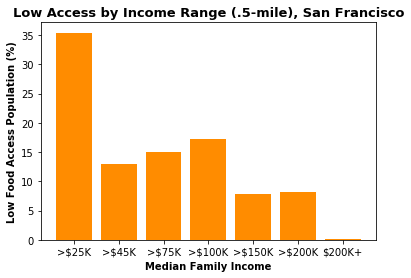

In [227]:
# Chart SF population by income data

x_axis = np.arange(len(income_labels))
y = fa_by_income['% SF Low Acess, .5-mile']

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [">$25K", ">$45K", ">$75K", ">$100K", ">$150K", ">$200K", "$200K+"])
plt.xlabel(("Median Family Income"), fontweight='bold')

plt.ylabel(("Low Food Access Population (%)"), fontweight='bold')

plt.bar(x_axis, y, color='darkorange')

plt.title(("Low Access by Income Range (.5-mile), San Francisco"), fontweight='bold', fontsize=13)

plt.savefig("Images/lowaccessbyincomesf.png")

plt.show()


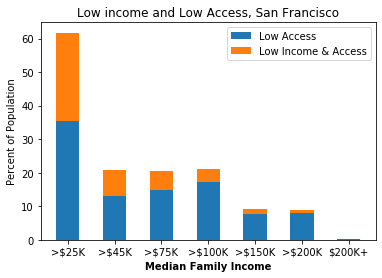

In [228]:
# N = 5
ind = np.arange(len(income_labels))
# menMeans = (20, 35, 30, 35, 27)
# womenMeans = (25, 32, 34, 20, 25)

low_acc = fa_by_income['% SF Low Acess, .5-mile']
low_i_a = fa_by_income['% SF Low Income Pop']


tick_locations = [value for value in ind]
plt.xticks(tick_locations, [">$25K", ">$45K", ">$75K", ">$100K", ">$150K", ">$200K", "$200K+"])
plt.xlabel(("Median Family Income"), fontweight='bold')

# ind = np.arange(N)    # the x locations for the groups
width = .5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, low_acc, width)
p2 = plt.bar(ind, low_i_a, width,
              bottom=low_acc)

plt.ylabel('Percent of Population')
plt.title('Low income and Low Access, San Francisco')
plt.legend((p1[0], p2[0]), ('Low Access', 'Low Income & Access'))

plt.show()

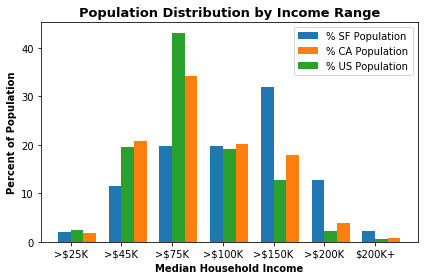

In [229]:
# plot income range distributin by population for comparison
sf = pop_by_income['% SF Population']
ca = pop_by_income['% CA Population']
us = pop_by_income['% US Population']


# set the x-axis to equal range of length of income lables 
x_axis = np.arange(len(income_labels))  # the label locations
width = .25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, sf, width, label='% SF Population')
rects2 = ax.bar(x_axis + width*1.5, ca, width, label='% CA Population')
rects3 = ax.bar(x_axis + width/2, us, width, label='% US Population')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(('Percent of Population'), fontweight='bold')
ax.set_xlabel(('Median Household Income'), fontweight='bold')
ax.set_title(('Population Distribution by Income Range'), fontweight='bold', fontsize=13)
ax.set_xticks(x_axis)
ax.set_xticklabels(income_labels)
ax.legend()


fig.tight_layout()
plt.savefig("Images/popbyincomeuscasf.png")

plt.show()

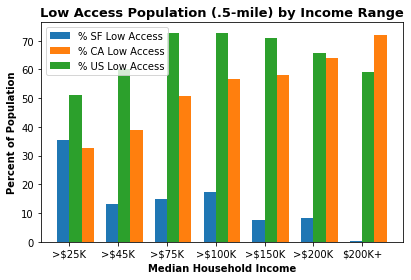

In [230]:
# plot income range distributin by population for comparison
sf = fa_by_income['% SF Low Acess, .5-mile']
ca = fa_by_income['% CA Low Acess, .5-mile']
us = fa_by_income['% US Low Acess, .5-mile']


# set the x-axis to equal range of length of income lables 
x_axis = np.arange(len(income_labels))  # the label locations
width = .25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, sf, width, label='% SF Low Access')
rects2 = ax.bar(x_axis + width*1.5, ca, width, label='% CA Low Access')
rects3 = ax.bar(x_axis + width/2, us, width, label='% US Low Access')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(('Percent of Population'), fontweight='bold')
ax.set_xlabel(('Median Household Income'), fontweight='bold')
ax.set_title(('Low Access Population (.5-mile) by Income Range'), fontweight='bold', fontsize=13)
ax.set_xticks(x_axis)
ax.set_xticklabels(income_labels)
ax.legend(loc="best")

fig.tight_layout()
plt.savefig("Images/accessbyincomesfcaus5.png")

plt.show()

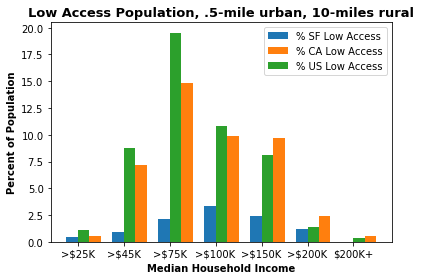

In [231]:
# plot income range distributin by population for comparison
sf = fa_by_income['% SF Low Access, .5/10']
ca = fa_by_income['% CA Low Access, .5/10']
us = fa_by_income['% US Low Access, .5/10']

# set the x-axis to equal range of length of income lables 
x_axis = np.arange(len(income_labels))  # the label locations
width = .25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, sf, width, label='% SF Low Access')
rects2 = ax.bar(x_axis + width*1.5, ca, width, label='% CA Low Access')
rects3 = ax.bar(x_axis + width/2, us, width, label='% US Low Access')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(('Percent of Population'), fontweight='bold')
ax.set_xlabel(('Median Household Income'), fontweight='bold')
ax.set_title(('Low Access Population, .5-mile urban, 10-miles rural'), fontweight='bold', fontsize=13)
ax.set_xticks(x_axis)
ax.set_xticklabels(income_labels)
ax.legend()

fig.tight_layout()

plt.savefig("Images/accessbyincomeussfca5_10.png")

plt.show()

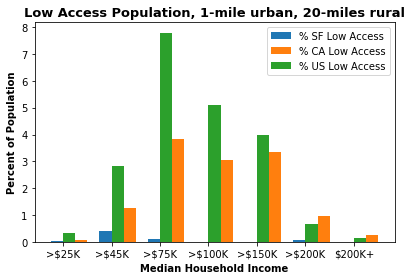

In [232]:
# plot income range distributin by population for comparison
sf = fa_by_income['% SF Low Access, 1/20']
ca = fa_by_income['% CA Low Access, 1/20']
us = fa_by_income['% US Low Access, 1/20']

# set the x-axis to equal range of length of income lables 
x_axis = np.arange(len(income_labels))  # the label locations
width = .25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_axis - width/2, sf, width, label='% SF Low Access')
rects2 = ax.bar(x_axis + width*1.5, ca, width, label='% CA Low Access')
rects3 = ax.bar(x_axis + width/2, us, width, label='% US Low Access')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(('Percent of Population'), fontweight='bold')
ax.set_xlabel(('Median Household Income'), fontweight='bold')
ax.set_title(('Low Access Population, 1-mile urban, 20-miles rural'), fontweight='bold', fontsize=13)
ax.set_xticks(x_axis)
ax.set_xticklabels(income_labels)
ax.legend()


fig.tight_layout()
plt.savefig("Images/accessbyincomeussfca1_20.png")

plt.show()